# Heart Failure Prediction:
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an
estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that
can be used to predict mortality by heart failure.
Most cardiovascular diseases can be prevented by addressing behavioural risk factors such
as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol
using population-wide strategies.
People with cardiovascular disease or who are at high cardiovascular risk (due to the
presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or
already established disease) need early detection and management wherein a machine
learning model can be of great help.

# Objective:
To create a classification filter (Using Logistics Regression &amp; KNN Classification
Algorithm) to predict Heart Failure. Compare the performance of the filters

# Importing required Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Get, Explore and pre-process data

In [2]:
df = pd.read_csv(r"C:\Users\avata\Downloads\heart_failure_clinical_records.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df.head() #check the top 5 rows

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.tail() #Check the last 5 rows

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
df.info() #concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.describe().transpose() #summary statistics

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [7]:
df.dtypes #checking the datatypes 

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [8]:
string_col = df.select_dtypes(include="object").columns #Converting the data types to string from object 
df[string_col]=df[string_col].astype("string")
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [9]:
df.isnull().sum() # Checking for null values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [10]:
#The dataset has no missing values.

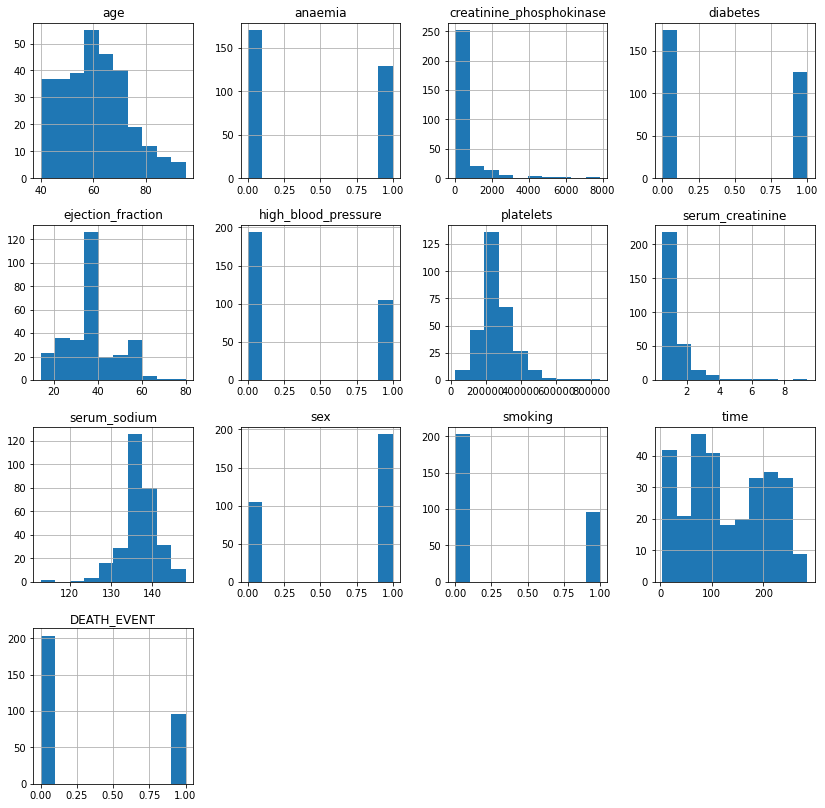

In [11]:
numbers = pd.Series(df.columns)   #Plotting Histograms
df[numbers].hist(figsize = (14, 14))
plt.show();

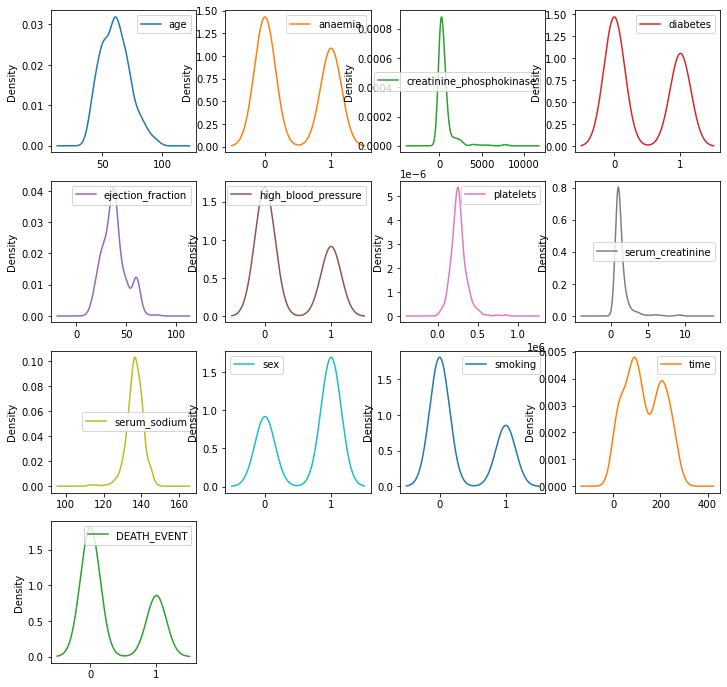

In [12]:
df.plot(kind = 'density', subplots= True, layout = (4,4), sharex =False, figsize = (12, 12));

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

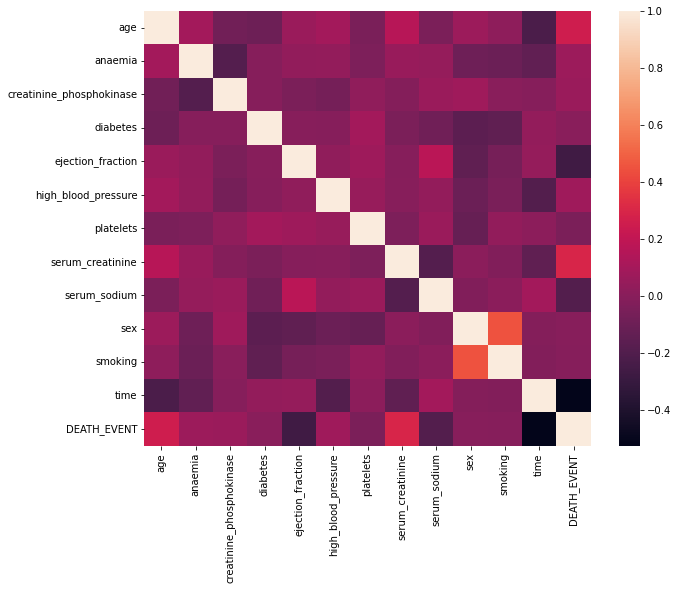

In [15]:
#Heatmap to check the correaltions 
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
df.corr()[abs(df.corr()['DEATH_EVENT']) > 0.1]['DEATH_EVENT'] 

# Selecting Featuers
#'time','ejection_fraction','serum_creatinine'

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

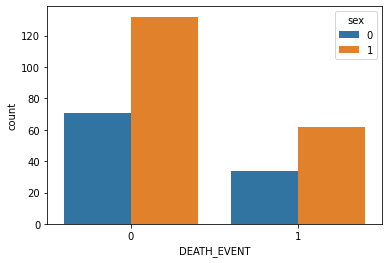

In [16]:
sns.countplot(x='DEATH_EVENT',hue='sex',data=df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

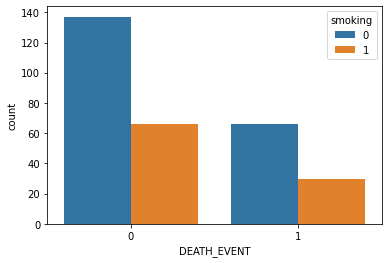

In [17]:
sns.countplot(x='DEATH_EVENT',hue='smoking',data=df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

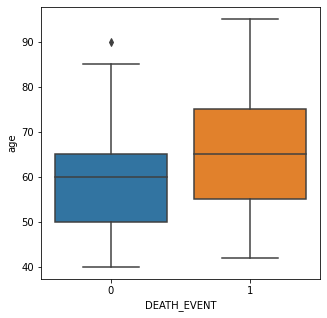

In [18]:
plt.figure(figsize=(5,5))
sns.boxplot(x="DEATH_EVENT", y="age", data=df)

In [19]:
print(df['DEATH_EVENT'].value_counts())

print(df['anaemia'].value_counts())

print(df['diabetes'].value_counts())

print(df['high_blood_pressure'].value_counts())

print(df['smoking'].value_counts())

0    203
1     96
Name: DEATH_EVENT, dtype: int64
0    170
1    129
Name: anaemia, dtype: int64
0    174
1    125
Name: diabetes, dtype: int64
0    194
1    105
Name: high_blood_pressure, dtype: int64
0    203
1     96
Name: smoking, dtype: int64


# Model Selection, Prediction and Performance 

In [72]:
Features = ['time','ejection_fraction','serum_creatinine']
x = df[Features]
y = df["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=4)
accuracy_list = []

In [73]:
scalerer = StandardScaler()
scalerer.fit(x)
scaled_feature = scalerer.transform(x)

In [74]:
X_train, x_test, y_train, y_test = train_test_split(scaled_feature,df['DEATH_EVENT'],
                                                    test_size=0.2)

# LogisticRegression

In [75]:
log_reg= LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

In [76]:
print(confusion_matrix(y_test,log_reg_pred))
print(classification_report(y_test,log_reg_pred))
print("Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

[[47  0]
 [13  0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        47
           1       0.00      0.00      0.00        13

    accuracy                           0.78        60
   macro avg       0.39      0.50      0.44        60
weighted avg       0.61      0.78      0.69        60

Accuracy of Logistic Regression is :  78.33%


Text(0.5, 1.0, 'Logistic Regression')

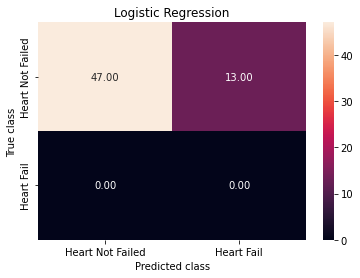

In [77]:
log_reg_y_pred = log_reg.predict(x_test)
log_reg_cm = metrics.confusion_matrix(log_reg_y_pred, y_test)
sns.heatmap(log_reg_cm, annot=True, fmt='.2f',
xticklabels = ["Heart Not Failed","Heart Fail"] ,
yticklabels = ["Heart Not Failed","Heart Fail"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

#  KNeighborsClassifier

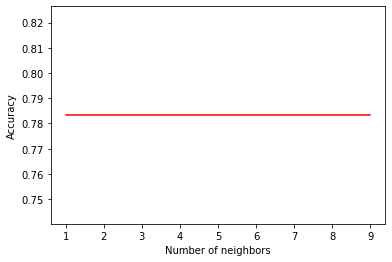

In [79]:
from sklearn.neighbors import KNeighborsClassifier
kmax=10
mean_acc=np.zeros((kmax-1))

for i in range(1,kmax):
    kn=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    x1=kn.predict(x_test)
    mean_acc[i-1]=metrics.accuracy_score(y_test,x1)
plt.plot(range(1,kmax),mean_acc,'r')
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.show()

In [81]:
kn=KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
x1=kn.predict(x_test)
print(confusion_matrix(y_test,x1))
print(classification_report(y_test,x1))
print("The best accuracy of KNN was", mean_acc.max(),"with k=",mean_acc.argmax()+1)

[[41  6]
 [ 3 10]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        47
           1       0.62      0.77      0.69        13

    accuracy                           0.85        60
   macro avg       0.78      0.82      0.80        60
weighted avg       0.87      0.85      0.86        60

The best accuracy of KNN was 0.7833333333333333 with k= 1


<Figure size 432x288 with 0 Axes>

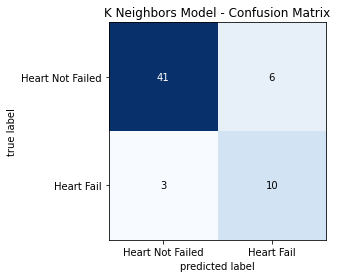

In [83]:
cm = confusion_matrix(y_test,x1)
plt.figure()
plot_confusion_matrix(cm, hide_ticks=True)
plt.title("K Neighbors Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"])
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"])
plt.show()